<a href="https://colab.research.google.com/github/zoyafatima00/zoyafatima00-tasks_by_FusionFlareTech/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1. Setup Kaggle API and Download Dataset***

In [ ]:
!mkdir -p ~/.Kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 33% 5.00M/15.1M [00:00<00:00, 44.3MB/s]
100% 15.1M/15.1M [00:00<00:00, 95.0MB/s]


# ***2. Extract Dataset***

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## ***3. Import Required Libraries***

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


### ***4. Encode Labels***

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])
# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# ***5. nitialize Data Variables, Load and Process Tumor Images***

In [ ]:
data = []
paths = []
results = []

for r, d, f in os.walk('/content/yes'):
  for file in f:
    if '.jpg' in file:
        paths.append(os.path.join(r, file)) # Use paths instead of path

for path in paths :
  img = Image.open(path)
  img = img.resize((128,128))
  img = np.array(img)
  if img.shape == (128,128,3):
    data.append(img)
    results.append(encoder.transform([[0]]).toarray())



# ***6. Load and Process Normal Images***

In [ ]:
paths = [] # Initialize paths as a list

for r, d, f in os.walk('/content/no'):
  for file in f:
    if '.jpg' in file:
        paths.append(os.path.join(r, file)) # Append to the paths list

for path in paths :
  img = Image.open(path)
  img = img.resize((128,128)) # Use resize with a tuple
  img = np.array(img)
  if img.shape == (128,128,3):
    data.append(img)
    results.append(encoder.transform([[1]]).toarray())

# ***7. Convert Data to Numpy Arrays***

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
results = np.array(results)
results = results.reshape(139,2)

# ***8. Split Data into Training and Testing Sets***

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, results, test_size=0.2, shuffle=True, random_state=0)

# ***9. Build and Compile the Model***

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [ ]:
y_train.shape

(111, 2)

# ***10. Train the Model***

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - loss: 36.4057 - val_loss: 137.9841
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - loss: 20.3876 - val_loss: 84.7425
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - loss: 8.1032 - val_loss: 12.5140
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - loss: 7.1362 - val_loss: 10.7595
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 7.7186 - val_loss: 7.4172
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - loss: 2.0010 - val_loss: 18.9361
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 3.2167 - val_loss: 22.6478
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 3.4975 - val_loss: 18.5415
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 1.0157 - val_loss: 13.8198
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - loss: 0.5887 - val_loss: 9.4647
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - loss: 0.1686 - val_loss: 6.3598
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - loss: 0.1414 - val_loss: 4.0977
Epo

# ***11. Plot Training and Validation Loss***

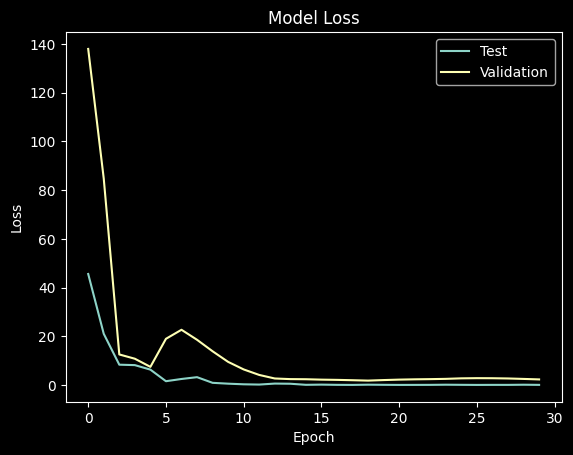

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# ***12. Define Prediction Function ***

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

# 13. Test the ***Model***

In [ ]:
import cv2

100.0% Confidence Its a Tumor


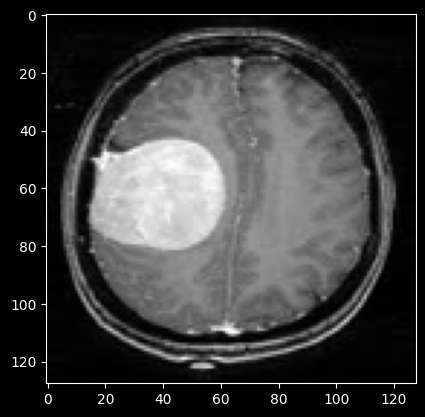

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2

img = cv2.imread('/content/yes/Y1.jpg')
# resize img in place
img = cv2.resize(img,(128,128))
x = np.array(img)
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

100.0% Confidence No, Its not a tumor


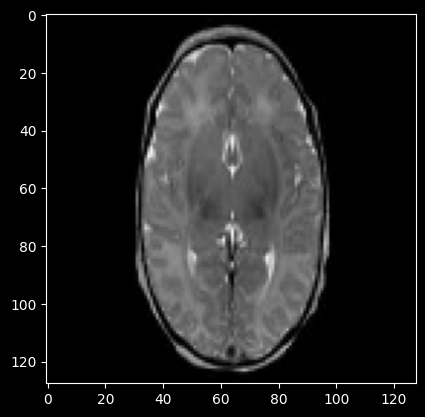

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2

img = cv2.imread('/content/no/12 no.jpg')
# resize img in place
img = cv2.resize(img,(128,128))
x = np.array(img)
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

100.0% Confidence This Is No, Its not a tumor


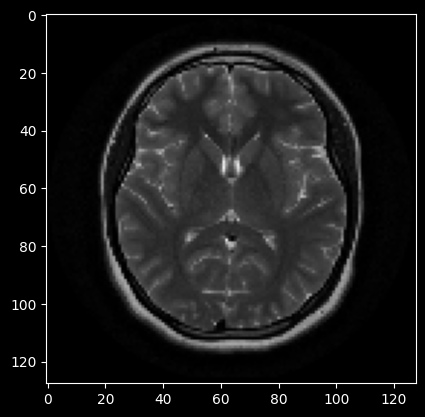

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2

img = cv2.imread('/content/no/1 no.jpeg')
# resize img in place
img = cv2.resize(img,(128,128))
x = np.array(img)
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

86.35974526405334% Confidence This Is Its a Tumor


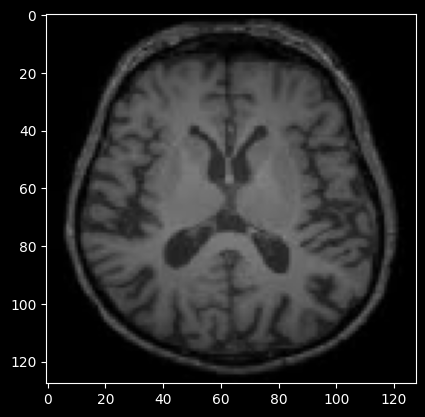

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2

img = cv2.imread('/content/no/10 no.jpg')
# resize img in place
img = cv2.resize(img,(128,128))
x = np.array(img)
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

# ***13. Save the Model in TensorFlow SavedModel Format***

In [ ]:
import tensorflow as tf

export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)


# ***14.Convert the SavedModel to TensorFlow Lite Format***

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib

In [ ]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

134347268

# ***15. Load and Allocate Tensors for the TensorFlow Lite Model***

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from matplotlib.pyplot import imshow

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


# ***16.Preprocess and Predict Image Function***

In [ ]:
def preprocess_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = np.array(img, dtype=np.float32)
    img = img / 255.0  # Normalize image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)

    # Set the tensor to the input data
    interpreter.set_tensor(input_details[0]['index'], img)

    # Run the inference
    interpreter.invoke()

    # Get the results
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Process the results
    prediction = np.argmax(output_data)
    confidence = np.max(output_data) * 100
    return prediction, confidence


# *17.Test the Tflite Model with an Image*

100.00% Confidence This Is No, Its not a tumor


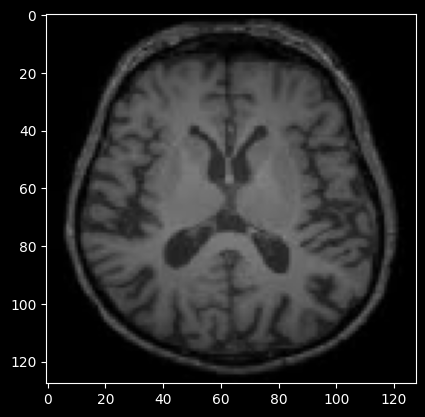

In [ ]:
def names(number):
    return 'Its a Tumor' if number == 0 else 'No, Its not a tumor'

# Test the model with an image
image_path = '/content/no/10 no.jpg'
prediction, confidence = predict(image_path)

# Load the image for displaying
img = cv2.imread(image_path)
img = cv2.resize(img, (128, 128))  # Resize for consistency
imshow(img)
print(f"{confidence:.2f}% Confidence This Is {names(prediction)}")


In [ ]:
from google.colab import files
files.download('/content/model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('tumour_detect_model.tf')

In [ ]:
KERAS_MODEL_PATH = 'tumour_detect_model.tf'
model.save(KERAS_MODEL_PATH, save_format='tf')

In [ ]:
# convert the TF model to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(KERAS_MODEL_PATH)
tflite_model = converter.convert()

In [ ]:
# Save the TFLITE model
with open('modelc2f.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
import tensorflow as tf
print(tf.__version__)


In [ ]:
from google.colab import files

files.download('/content/modelc2f.tflite')

hgjb